In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import colombia_weather
import prepare
import explore

In [8]:
import seaborn as sns

In [6]:
#matplot lib needs this to avoid datatype error with pandas
pd.plotting.register_matplotlib_converters()

In [ ]:
blob = prepare.get_data()

In [ ]:
blob.tail()

In [ ]:
df = pd.read_csv("psd_coffee.csv")

In [ ]:
df = df[df.Country_Name == "Colombia"]

In [ ]:
df.dtypes

In [ ]:
df[df.Market_Year == 2015]

In [ ]:
import colombia_weather

In [ ]:
pd.DataFrame.from_dict(colombia_weather.stations,orient="index")

In [ ]:
from colombia_weather import weather_stations

In [ ]:
colombia_weather.weather_stations

In [ ]:
colombia_weather.get_weather()

In [ ]:
df = pd.read_csv("coffee_data/coffee.csv")

In [ ]:
df.price_adjusted_inflation.plot()

In [ ]:
df

In [ ]:
df.date = df.date.apply(pd.to_datetime)

In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df.price_adjusted_inflation.plot()
plt.title("Price of coffee 1958-")

In [ ]:
import plotly
import pandas as pd
import plotly.graph_objects as go

In [ ]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

In [ ]:
years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002","2007"]

In [ ]:
continents = list(dataset['continent'].unique())

In [ ]:
fig_dict = {
    "data": [],
    "layout":{},
    "frames": []
    }

In [ ]:
fig_dict['layout']['xaxis'] = {"range": [30,85],'title':'Life Expactancy'}

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
 
# basic sankey chart
Sankey(flows=[1, -0.20, -0.15, -0.05, -0.50, -0.10], labels=['Colombia', 'First', 'Second', 'Third', 'Fourth', 'Fifth'], orientations=[0, 1, -1, -1, 0,1]).finish()
plt.title("Sankey diagram with default settings")


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Sankey(
    arrangement = "snap",
    node = {
        "label": ["A", "B", "C", "D", "E", "F"],
        "x": [0.5, 0.1, 0.5, 0.7, 0.3, 0.5],
        "y": [0.7, 0.5, 0.2, 0.4, 0.2, 0.3],
        'pad':10},  # 10 Pixels 
    link = {
        "source": [0, 0, 1, 2, 5, 4, 3, 5],
        "target": [5, 3, 4, 3, 0, 2, 2, 3],
        "value": [1, 2, 1, 1, 1, 1, 1, 2]}))

fig.show()

In [ ]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label']
  ))])

fig.update_layout(
    hovermode = 'x',
    title="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()

In [ ]:
country_code = pd.read_json('coffee_data/country_codes.json')

In [ ]:
country_code.columns = ['country','dest']

In [ ]:
country_code

In [ ]:
coffee_export_by_country = pd.read_csv("coffee_data/coffee_export_numbers.csv")

In [ ]:
coffee_export_by_country.shape

In [ ]:
coffee_export_by_country = pd.merge(coffee_export_by_country,country_code,on="dest",how="outer")

In [ ]:
coffee_export_by_country.to_csv("coffee_data/coffee_export_by_country.csv")

In [ ]:
df = pd.read_csv('coffee_data/coffee_export_by_country.csv')

In [ ]:
df.shape

In [ ]:
df = colombia_weather.get_weather()

In [ ]:
df[df.PRCP >=0].shape[0]/df.shape[0]

In [ ]:
df[df.DATE > '1990-01-01'].head(5)

In [ ]:
df.DATE = pd.to_datetime(df.DATE)
df["DATE2"] = df.DATE

In [ ]:
df.dtypes

In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
stations = df.NAME.unique()

In [ ]:
station_activity = pd.DataFrame(df.NAME.unique(),columns=['station_name'])

In [ ]:
station_activity.head(2)

In [ ]:
station_activity = station_activity.sort_values(by='station_name').set_index('station_name')

In [ ]:
station_activity.head()

In [ ]:
station_activity = pd.concat([station_activity,df.sort_values(by='NAME').groupby("NAME")['DATE2'].min()],axis=1).rename(columns={"DATE2":"first_date_record"})
station_activity = pd.concat([station_activity,df.sort_values(by='NAME').groupby("NAME")['DATE2'].max()],axis=1).rename(columns={"DATE2":"last_date_record"})

In [ ]:
station_activity

In [ ]:
grouper = df.groupby([pd.Grouper(freq='1M'),'NAME'])

In [ ]:
grouper = grouper.mean().reset_index(level='NAME')

In [ ]:
grouper.groupby([pd.Grouper(freq='Y')])

In [ ]:
year_1960 = grouper[grouper.index < '1961-01-01']

In [ ]:
year_1960.NAME.nunique()

In [ ]:
grouper.groupby([pd.Grouper(freq='Y')])['NAME'].nunique()

In [ ]:
def weather_stations_by_year():
    df = colombia_weather.get_weather()
    df.DATE = pd.to_datetime(df.DATE)
    df.set_index('DATE',inplace=True)
    return df.groupby([pd.Grouper(freq='Y')])['NAME'].nunique()

In [ ]:
df = weather_stations_by_year()

In [ ]:
df = prepare.get_data()

In [ ]:
weather_stations = pd.DataFrame.from_dict(colombia_weather.weather_stations,orient='index')

In [ ]:
weather_stations = weather_stations.sort_index()

In [ ]:
station_dates = pd.concat([weather_stations,station_activity],axis=1)

In [ ]:
station_dates = station_dates.dropna().rename(columns = {0: "department"})

In [ ]:
station_dates.sort_values(by='first_date_record')

In [ ]:
station_dates.to_csv('weather_data/station_dates.csv')

In [ ]:
blob = pd.read_csv('coffee_data/coffee_export_by_country.csv')

In [ ]:
df = prepare.get_data()

In [ ]:
df.head(5)

In [ ]:
weather_stations = pd.DataFrame.from_dict(colombia_weather.weather_stations,orient="index")

In [ ]:
weather_stations.reset_index(inplace=True)
df.reset_index(inplace=True)

In [ ]:
weather_stations

In [ ]:
df.shape

In [ ]:
station_dates = pd.merge(df,weather_stations,how='left',left_on='region',right_on=0)

In [ ]:
weather_stations.shape

In [ ]:
station_dates.set_index('date',inplace=True)

In [ ]:
station_dates.head(2)

In [ ]:
station_activity = pd.DataFrame(station_dates.region.unique())

In [ ]:
station_activity.dropna(inplace=True)

In [ ]:
station_activity.columns = ['region']

In [ ]:
station_activity

In [ ]:
df.reset_index(inplace=True)
df.head(2)

In [ ]:
station_activity = pd.concat([station_activity,df.sort_values(by='region').groupby("region")['date'].min()],axis=1).rename(columns={"date":"first_date_record"})
station_activity = pd.concat([station_activity,df.sort_values(by='region').groupby("region")['date'].max()],axis=1).rename(columns={"date":"last_date_record"})

In [ ]:
station_activity = station_activity.iloc[13:].drop(columns='region')

In [ ]:
station_activity.to_csv('weather_data/station_dates.csv')

In [ ]:
df = prepare.get_weather()

In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
df.head(2)

In [ ]:
df.groupby(['STATION','')

In [ ]:
df.columns.apply(lower)

In [ ]:
df.columns = map(str.lower, df.columns)

In [ ]:
df

In [ ]:
df = prepare.get_data()

In [ ]:
df = df.sort_values(by='region').sort_index()

In [ ]:
df.tail(30)

In [ ]:
df[df.mean_temp.isna()].shape

In [ ]:
mean_temp = df[['region','mean_temp']]

In [ ]:
mean_temp.head(20)

In [ ]:
mean_temp['prior_year_mean_temp'] = mean_temp.mean_temp.diff(periods=12)

In [ ]:
mean_temp.head(30)

In [ ]:
df.index.nunique()

In [ ]:
mean_temp.reset_index(inplace=True)

In [ ]:
mean_temp['unique'] = mean_temp.date.map(str) + mean_temp.region

In [ ]:
mean_temp.dtypes

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.region.unique()

In [ ]:
#for r in df.region.unique():
df[df.region == "Narino"].quantity.plot()

In [ ]:
grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])

In [ ]:
region_quantity = grouper.mean()

In [ ]:
region_quantity.columns

In [ ]:
region_quantity = region_quantity.reset_index()

In [ ]:
region_quantity.set_index('date',inplace=True)

In [ ]:
region_quantity

In [ ]:
def production_by_region(df):
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_quantity = grouper.mean()
    for c in region_quantity.columns:
        region_quantity = group.c.mean()
        region_quantity = region_quantity.reset_index()
        region_quantity.set_index('date',inplace=True)

        print("Top Coffee Producing Regions of Colombia")
        for r in region_quantity.region.unique():
            region_quantity[region_quantity.region == r].quantity.plot()
            plt.title("Thousands of 60kg bags produced by " + r)
            plt.ylabel("Thousands of 60kg bags")
            plt.xlabel("Year")
            plt.show()

In [ ]:
production_by_region(df)

In [ ]:
def production_by_region(df):
    
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_quantity = grouper.quantity.sum()
    region_quantity = region_quantity.reset_index()
    region_quantity.set_index('date',inplace=True)

    print("Top Coffee Producing Regions of Colombia")
    for r in region_quantity.region.unique():
        region_quantity[region_quantity.region == r].quantity.plot()
        plt.title("Thousands of 60kg bags produced by " + r)
        plt.ylabel("Thousands of 60kg bags")
        plt.xlabel("Year")
        plt.show()

In [ ]:
production_by_region(df)

In [ ]:
def precipitation_by_region(df):
    
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_precip = grouper.mean_precip.sum()
    region_precip = region_precip.reset_index()
    region_precip.set_index('date',inplace=True)

    print("Average precipitation by Region of Colombia")
    for r in region_precip.region.unique():
        region_precip[region_precip.region == r].mean_precip.plot()
        plt.title("Average Precipitation in mm " + r)
        plt.ylabel("Avg Precipitation (mm)")
        plt.xlabel("Year")
        plt.show()

In [ ]:
precipitation_by_region(df)

In [ ]:
def avg_temp_by_region(df):
    
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_precip = grouper.mean_precip.sum()
    region_precip = region_precip.reset_index()
    region_precip.set_index('date',inplace=True)

    print("Average precipitation by Region of Colombia")
    for r in region_precip.region.unique():
        region_precip[region_precip.region == r].mean_precip.plot()
        plt.title("Average Precipitation in mm " + r)
        plt.ylabel("Avg Precipitation (mm)")
        plt.xlabel("Year")
        plt.show()

In [ ]:
df = prepare.get_data()

In [ ]:
explore.production_by_region(df)
#df[df.index=='1971-04-01']

In [ ]:
df.region.unique()

In [ ]:
df[pd.isna(df.region)]

In [ ]:
df = df[df.index != '1971-04-01']

In [ ]:
df.shape

In [ ]:
df = df[df.index != '1971-04-01']
grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
region_quantity = grouper.quantity.sum()
region_quantity = region_quantity.reset_index()

In [2]:
df = prepare.get_prepped()

In [ ]:
outliers = pd.DataFrame(df.groupby([pd.Grouper(freq='1Y')])['inflated'].mean())

In [ ]:
max_inflated = pd.DataFrame(df.groupby([pd.Grouper(freq='1Y')])['inflated'].max()).rename(columns={'inflated':'max_inflated'})

In [ ]:
min_inflated = pd.DataFrame(df.groupby([pd.Grouper(freq='1Y')])['inflated'].min()).rename(columns={'inflated':'min_inflated'})

In [ ]:
outliers = pd.merge(outliers,max_inflated,left_index=True,right_index=True)

In [ ]:
outliers = pd.merge(outliers,min_inflated,left_index=True,right_index=True)

In [3]:
blob = explore.price_outliers(df)

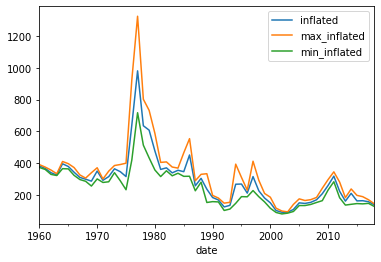

In [7]:
blob.plot()

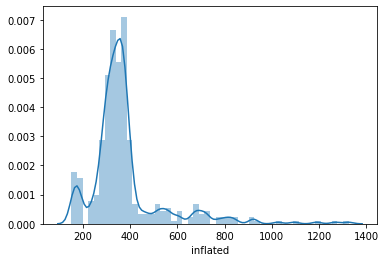

In [12]:
sns.distplot(df.inflated[:"1991"])